# Landsat 8 - Scene Ingestion

Ingestion is the process of tile data up into a faster storage format or projection system for high performance access. "Datasets is stored, into a new storage scheme for the data. This will be recorded in the index as a new Product, and the data will be manipulated and written out to disk in the new format."

### Ingesting Config File

"An ingestion config is a document which defines the way data should be prepared for high performance access. This can include slicing the data into regular chunks, reprojecting into to the desired projection and compressing the data."

Use the **ingestion config file** located at `../products/LS8_OLI_LASRC/ingest_file.yml` to ingest the Landsat 8 Scene already indexed.

In [5]:
!datacube -v ingest -c ../products/LS8_OLI_LASRC/ingest_file.yml

2020-08-23 01:10:12,627 214 datacube INFO Running datacube command: /usr/local/bin/datacube -v ingest -c ../products/LS8_OLI_LASRC/ingest_file.yml
2020-08-23 01:10:13,349 214 datacube-ingest INFO Created DatasetType LS8_OLI_LASRC
2020-08-23 01:10:13,805 214 datacube.drivers.postgres._dynamic INFO Creating index: dix_ls8_oli_lasrc_lat_lon_time
2020-08-23 01:10:14,240 214 datacube.drivers.postgres._dynamic INFO Creating index: dix_ls8_oli_lasrc_time_lat_lon
2020-08-23 01:10:15,214 214 datacube-ingest INFO 8 tasks discovered
2020-08-23 01:10:15,305 214 datacube-ingest INFO Submitting task: (-75, 3, numpy.datetime64('2017-12-22T14:54:24.000000000'))
2020-08-23 01:10:15,306 214 datacube-ingest INFO Submitting task: (-74, 3, numpy.datetime64('2017-12-22T14:54:24.000000000'))
2020-08-23 01:10:15,306 214 datacube-ingest INFO Submitting task: (-75, 4, numpy.datetime64('2017-12-22T14:54:24.000000000'))
2020-08-23 01:10:15,307 214 datacube-ingest INFO Submitting task: (-74, 4, numpy.datetime64('2

Once ingestion have finished observe that logs show that no erros have taken place `8 successful, 0 failed`. The above also indicates that the previously indexed scene has been split into 8 parts or tiles and these tiles have been successfully indexed in the datacube. 

List the list of products defined in the datacube.

In [6]:
!datacube product list

ls8_collections_sr_scene  Landsat 8 USGS Collection 1 Higher Level SR scene proessed using LaSRC. 30m UTM based projection.
LS8_OLI_LASRC             Landsat 8 USGS Collection 1 Higher Level SR scene proessed using LaSRC. Resampled to 30m EPSG:4326 projection with a sub degree tile size.


We now have two products defined in the datacube. One with the indexed data `ls8_collections_sr_scene` and the other with the ingested data `LS8_OLI_LASRC `.

List the 8 tiles created using the following command

In [7]:
!ls -l /ingested_storage/LS8_OLI_LASRC/

total 341040
-rw-r--r-- 1 datacube datacube  2166956 Aug 23 01:11 LS8_OLI_LASRC_4326_-73_4_20171222145424000000.nc
-rw-r--r-- 1 datacube datacube  4205186 Aug 23 01:11 LS8_OLI_LASRC_4326_-73_5_20171222145424000000.nc
-rw-r--r-- 1 datacube datacube 36402364 Aug 23 01:10 LS8_OLI_LASRC_4326_-74_3_20171222145424000000.nc
-rw-r--r-- 1 datacube datacube 92826691 Aug 23 01:11 LS8_OLI_LASRC_4326_-74_4_20171222145424000000.nc
-rw-r--r-- 1 datacube datacube 45158911 Aug 23 01:11 LS8_OLI_LASRC_4326_-74_5_20171222145424000000.nc
-rw-r--r-- 1 datacube datacube 30109391 Aug 23 01:10 LS8_OLI_LASRC_4326_-75_3_20171222145424000000.nc
-rw-r--r-- 1 datacube datacube 92538085 Aug 23 01:10 LS8_OLI_LASRC_4326_-75_4_20171222145424000000.nc
-rw-r--r-- 1 datacube datacube 45791882 Aug 23 01:11 LS8_OLI_LASRC_4326_-75_5_20171222145424000000.nc


Note that each tile was save in a new format, NetCDF.

Use the `dataset search` command to get information about every ingested tile. Select the information of one tile to perform a query.

In [9]:
!datacube dataset search

id: c076a33a-7b4c-474e-92b2-ea6b3c6fc964
product: ls8_collections_sr_scene
status: active
locations:
- file:///datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048/agdc-metadata.yaml
fields:
    creation_time: 2017-12-22 00:00:00
    format: GeoTiff
    instrument: OLI_TIRS
    label: null
    lat: {begin: 3.282245682956571, end: 5.387626094377365}
    lon: {begin: -70.87547257296065, end: -68.82294825857863}
    platform: LANDSAT_8
    product_type: LaSRC
    time: {begin: '2017-12-22T14:54:12', end: '2017-12-22T14:54:36'}
---
id: 84aa2ded-7f2c-443d-93e7-af91cb434106
product: LS8_OLI_LASRC
status: active
locations:
- file:///ingested_storage/LS8_OLI_LASRC/LS8_OLI_LASRC_4326_-75_3_20171222145424000000.nc
fields:
    creation_time: 2020-08-23 01:10:21.036752
    format: NetCDF
    instrument: OLI_TIRS
    label: null
    lat: {begin: 3.44469087847425, end: 3.798228}
    lon: {begin: -70.85561568551475, end: -69.92870500000001}
    platform: LANDSAT_8
    product_type: 

In [13]:
%%time

import datacube

dc = datacube.Datacube(app="Hello World")

xarr = dc.load(
    # Satellite 
    product="LS8_OLI_LASRC",
    # Area to be requested 
#     latitude=(3.44469087847425, 3.798228),
#     longitude=(-70.85561568551475, -69.92870500000001),
    latitude=(3.282245682956571, 4.23180268296),
    longitude=(-70.87547257296065, -69.930490073),
    # The query returns the images that were obtained 
    # in the time range specified
    # Time format (YYYY-MM-DD)
    # time=("2017-12-21","2017-12-23"),
    # Image spectral bands
    measurements=['blue'],
    output_crs='EPSG:4326',
    resolution=(-0.000271302,0.000269995)
)

xarr

CPU times: user 342 ms, sys: 163 ms, total: 505 ms
Wall time: 504 ms


<xarray.Dataset>
Dimensions:      (latitude: 3501, longitude: 3501, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-22T14:54:24
  * latitude     (latitude) float64 4.232 4.232 4.231 ... 3.283 3.283 3.282
  * longitude    (longitude) float64 -70.88 -70.88 -70.87 ... -69.93 -69.93
    spatial_ref  int32 4326
Data variables:
    blue         (time, latitude, longitude) int16 -9999 -9999 ... -9999 -9999
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

Plot the blue band of the dataset.

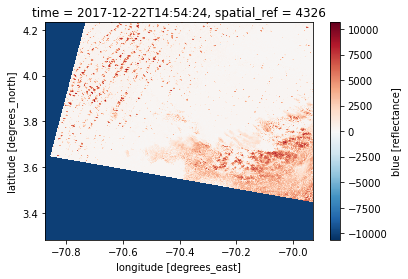

In [14]:
xarr.blue.plot()

### References

1. [Ingesting Data](https://datacube-core.readthedocs.io/en/latest/ops/ingest.html)